# Columns Description

LoanStatNew Description

addr_state The state provided by the borrower in the loan application

annual_inc The self-reported annual income provided by the borrower during registration.

annualincjoint The combined self-reported annual income provided by the co-borrowers during registration

application_type Indicates whether the loan is an individual application or a joint application with two co-borrowers

collectionrecoveryfee post charge off collection fee

collections12mthsexmed Number of collections in 12 months excluding medical collections

delinq_2yrs The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

desc Loan description provided by the borrower

dti A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, - - - excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

dti_joint A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, - excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income

earliestcrline The month the borrower's earliest reported credit line was opened

emp_length Employment length in years. Possible values are between 0 and 10 where 0 means less than one year

and 10 means ten or more years.

emp_title The job title supplied by the Borrower when applying for the loan.*

ficorangehigh The upper boundary range the borrower’s FICO at loan origination belongs to.

ficorangelow The lower boundary range the borrower’s FICO at loan origination belongs to.

funded_amnt The total amount committed to that loan at that point in time.

fundedamntinv The total amount committed by investors for that loan at that point in time.

grade LC assigned loan grade

home_ownership The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

# Loading DataSet and Required Libaray

In [42]:
import numpy as np
import pandas as pd

In [43]:
df_loan = pd.read_csv('loan_data.csv')
df_loan.head(5)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


# Columns Names

In [44]:
df_loan.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

# DataType Details

In [45]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387379 entries, 0 to 3387378
Data columns (total 30 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   year                  int64  
 2   issue_d               object 
 3   final_d               int64  
 4   emp_length_int        float64
 5   home_ownership        object 
 6   home_ownership_cat    int64  
 7   income_category       object 
 8   annual_inc            int64  
 9   income_cat            int64  
 10  loan_amount           int64  
 11  term                  object 
 12  term_cat              int64  
 13  application_type      object 
 14  application_type_cat  int64  
 15  purpose               object 
 16  purpose_cat           int64  
 17  interest_payments     object 
 18  interest_payment_cat  int64  
 19  loan_condition        object 
 20  loan_condition_cat    int64  
 21  interest_rate         float64
 22  grade                 object 
 23  grade_c

## Shape of Dataset

In [46]:
df_loan.shape

(3387379, 30)

# Number of categorical and Numerical Columns

In [47]:
df_num=df_loan.select_dtypes(include=np.number)

In [48]:
print('The number of Numerical Columns',len(df_num.columns))

The number of Numerical Columns 20


In [49]:
df_cat=df_loan.select_dtypes(exclude=np.number)

In [50]:
print('The number of Categorical Columns',len(df_cat.columns))

The number of Categorical Columns 10


# Finding the  Percent of Null Values In Dataset

In [51]:
Total = df_loan.isnull().sum().sort_values(ascending=False)          
Percent = (df_loan.isnull().sum()*100/df_loan.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
id,0,0.0
year,0,0.0
installment,0,0.0
recoveries,0,0.0
total_rec_prncp,0,0.0
total_pymnt,0,0.0
dti,0,0.0
grade_cat,0,0.0
grade,0,0.0
interest_rate,0,0.0


We dont have any null values so null value treatment is not Required

## Changing the Data type for issue Date

In [52]:
df_loan.issue_d=pd.to_datetime(df_loan.issue_d)

In [53]:
df_loan.dtypes

id                               int64
year                             int64
issue_d                 datetime64[ns]
final_d                          int64
emp_length_int                 float64
home_ownership                  object
home_ownership_cat               int64
income_category                 object
annual_inc                       int64
income_cat                       int64
loan_amount                      int64
term                            object
term_cat                         int64
application_type                object
application_type_cat             int64
purpose                         object
purpose_cat                      int64
interest_payments               object
interest_payment_cat             int64
loan_condition                  object
loan_condition_cat               int64
interest_rate                  float64
grade                           object
grade_cat                        int64
dti                            float64
total_pymnt              

## Dropping thecolumns which are not Required

In [54]:
df_num=df_num.drop(['id','year'],axis=1)

In [55]:
df_num.head()

,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
0,1012015,10.0,1,24000,1,5000,1,1,1,1,0,10.65,2,27.65,5861.071414,5000.00,0.00,162.87
1,1042013,0.5,1,30000,1,2500,2,1,2,2,1,15.27,3,1.00,1008.710000,456.46,117.08,59.83
2,1062014,10.0,1,12252,1,2400,1,1,3,2,0,15.96,3,8.72,3003.653644,2400.00,0.00,84.33
3,1012015,10.0,1,49200,1,10000,1,1,4,2,0,13.49,3,20.00,12226.302210,10000.00,0.00,339.31
4,1012016,1.0,1,80000,1,3000,2,1,4,1,0,12.69,2,17.94,3242.170000,2233.10,0.00,67.79


In [56]:
df_num.shape

(3387379, 18)

## 5-point summery of Dataset

In [57]:
df_loan.describe(include='all')

<ipython-input-57-9ccf8fc9614b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_loan.describe(include='all')


,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
count,3.387379e+06,3.387379e+06,3387379,3.387379e+06,3.387379e+06,3387379,3.387379e+06,3387379,3.387379e+06,3.387379e+06,...,3.387379e+06,3.387379e+06,3387379,3.387379e+06,3.387379e+06,3.387379e+06,3.387379e+06,3.387379e+06,3.387379e+06,3387379
unique,NaN,NaN,103,NaN,NaN,6,NaN,3,NaN,NaN,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,2008-01-02 00:00:00,NaN,NaN,RENT,NaN,Low,NaN,NaN,...,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,Northern-Irl
freq,NaN,NaN,1000306,NaN,NaN,1201390,NaN,1581218,NaN,NaN,...,NaN,NaN,615930,NaN,NaN,NaN,NaN,NaN,NaN,808685
first,NaN,NaN,2007-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.762594e+06,2.010168e+03,NaN,1.060524e+06,5.293106e+00,NaN,2.176662e+00,NaN,7.065093e+04,1.743979e+00,...,3.788690e-01,1.328306e+01,NaN,3.688483e+00,1.519161e+01,1.101524e+04,8.721106e+03,1.209329e+03,3.819546e+02,NaN
std,1.832837e+07,2.470244e+00,NaN,3.825686e+04,3.546021e+00,NaN,9.730323e-01,NaN,5.786952e+04,7.958690e-01,...,4.851055e-01,3.557012e+00,NaN,1.872758e+00,1.078893e+01,7.713871e+03,6.429249e+03,2.585603e+03,2.129642e+02,NaN
min,5.473400e+04,2.007000e+03,NaN,1.012008e+06,-1.594992e+00,NaN,1.000000e+00,NaN,0.000000e+00,1.000000e+00,...,0.000000e+00,5.318858e+00,NaN,1.000000e+00,-7.950813e+00,-5.302106e+03,-7.805788e+03,-7.951992e+03,-2.649706e+02,NaN
25%,2.616330e+05,2.008000e+03,NaN,1.022012e+06,2.000000e+00,NaN,1.000000e+00,NaN,3.785000e+04,1.000000e+00,...,0.000000e+00,1.074151e+01,NaN,2.000000e+00,9.510692e+00,5.100055e+03,3.602420e+03,0.000000e+00,2.225441e+02,NaN


## Outliers detection using boxplot

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


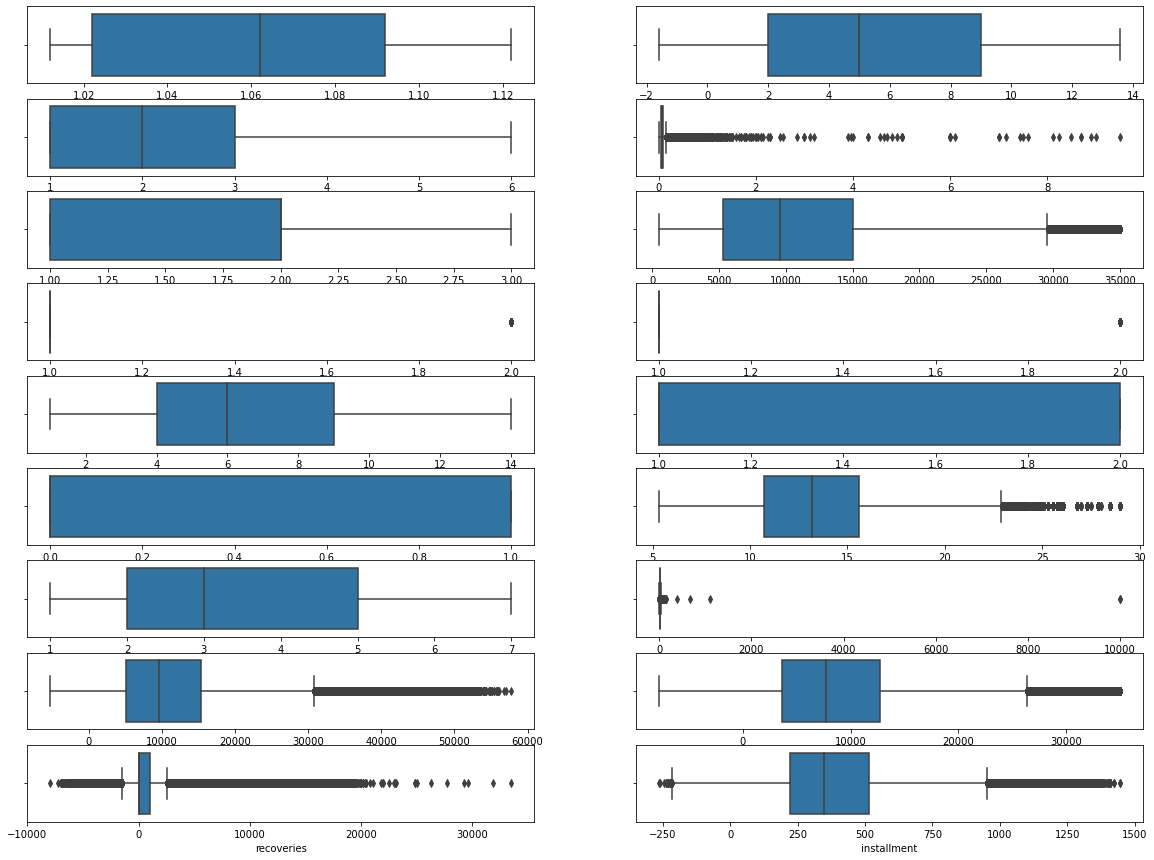

In [59]:
fig,ax=plt.subplots(nrows=9,ncols=2,figsize=(20,15))
for variable,subplot in zip(df_num.columns,ax.flatten()):
    sns.boxplot(x=df_num[variable],ax=subplot)


* We have outliers in annual_inc,loan_amount,total payment,intrest rate,dti,total,rec,pmcp
* The loan defaults happens in exceptional Cases and and we Have to cathch those exceptional cases that's why we wont do any outliers treatment

## Finding the Distribution of Data

In [60]:
df_cont=df_num[['annual_inc','loan_amount','interest_rate','dti',
       'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


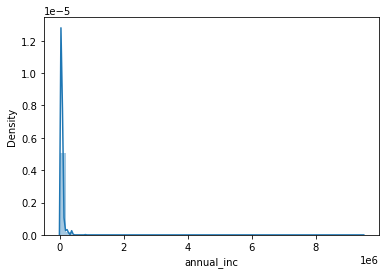

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


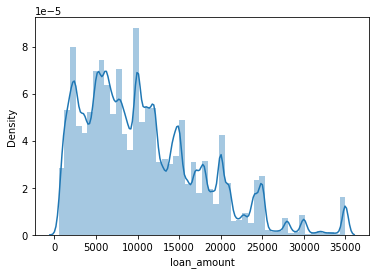

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


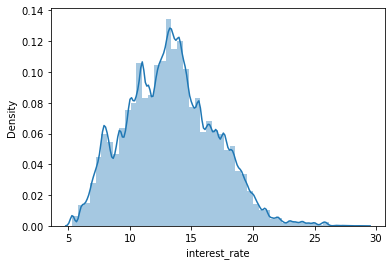

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


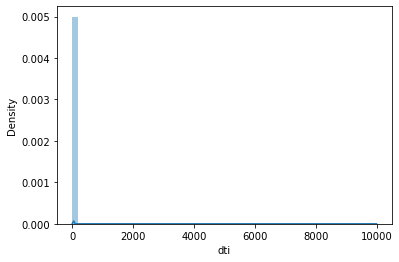

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


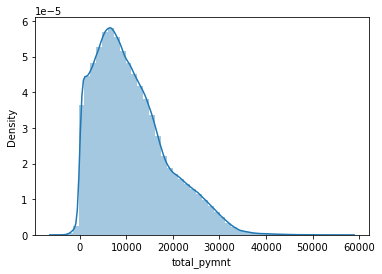

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


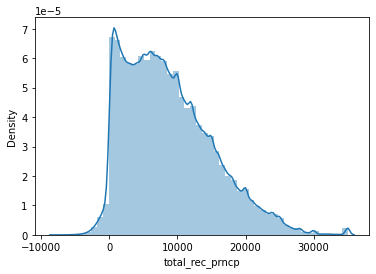

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


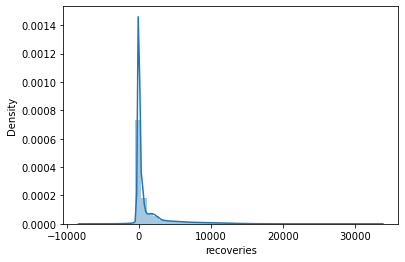

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


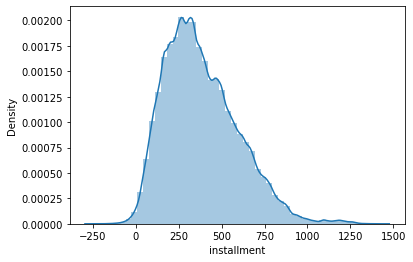

In [61]:
for i in df_cont.columns:
    sns.distplot(df_cont[i])
    plt.show()

### Data is normally distributed

# Performing the EDA operations on Dataset

In [62]:
df_loan.home_ownership.value_counts()

RENT        1201390
MORTGAGE    1145060
OWN          802965
OTHER        237911
NONE             50
ANY               3
Name: home_ownership, dtype: int64

In [63]:
def replace(item):
    if isinstance(item,str):
        if item=='NONE' or item=='ANY':
            item='OTHER'
            return item
        else:
            return item
df_loan.home_ownership=df_loan.home_ownership.apply(replace)

In [64]:
df_loan.home_ownership.value_counts()

RENT        1201390
MORTGAGE    1145060
OWN          802965
OTHER        237964
Name: home_ownership, dtype: int64

In [65]:
df_loan.groupby('home_ownership')['annual_inc'].mean()

home_ownership
MORTGAGE    75512.317021
OTHER       66015.237376
OWN         69655.240481
RENT        67601.185627
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='home_ownership'>

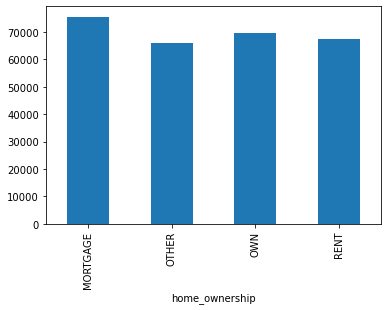

In [66]:
df_loan.groupby('home_ownership')['annual_inc'].mean().plot(kind='bar')

* Home ownership has approximately equal mean for annual income on all categories

<AxesSubplot:xlabel='term'>

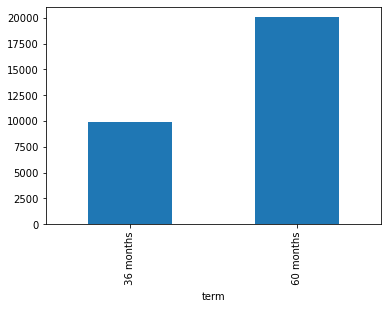

In [67]:
df_loan.groupby('term')['loan_amount'].mean().plot(kind='bar')

* Loan Terms of 60 months have more Loan Amount compare to 36 month term

<AxesSubplot:xlabel='purpose'>

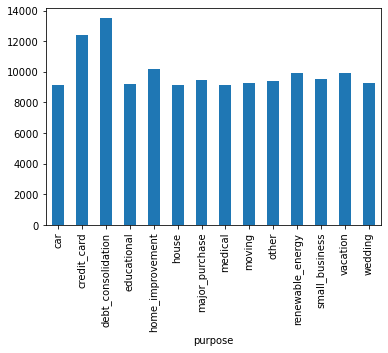

In [68]:
df_loan.groupby('purpose')['loan_amount'].mean().plot(kind='bar')

* Depth consolidation and credit_card purpose has the most amount of loan

In [69]:
df_loan.groupby('region')['region'].count()

region
Northern-Irl    808685
cannught        622212
leinster        705764
munster         565301
ulster          685417
Name: region, dtype: int64

<AxesSubplot:xlabel='region'>

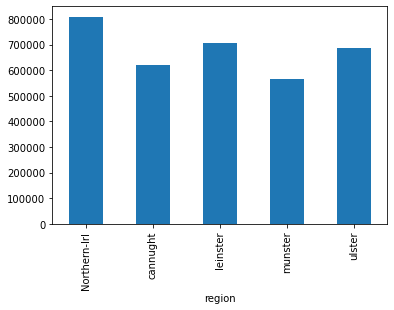

In [70]:
df_loan.groupby('region')['loan_condition_cat'].count().plot(kind='bar')

*Northen-irl region has heighest number of loan amount.

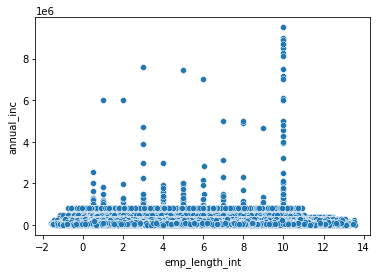

In [71]:
sns.scatterplot(x=df_loan['emp_length_int'], y=df_loan['annual_inc'])
plt.show()

In [ ]:
# For employee length equal to 10 that's where the annual_income is the highest and 
#employee length above 10 that's where the annual_income is the lowest.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


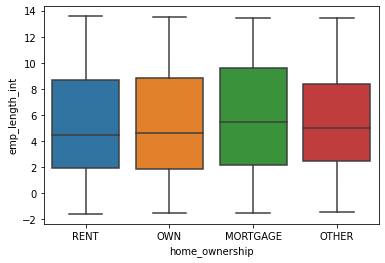

In [72]:
sns.boxplot(df_loan['home_ownership'], df_loan['emp_length_int'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


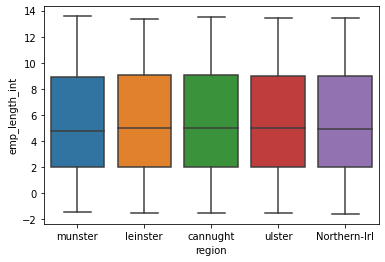

In [73]:
sns.boxplot(df_loan['region'], df_loan['emp_length_int'])
plt.show()

In [ ]:
#sns.pairplot(df_loan,hue='loan_condition_cat')

* Most of the people have rented home_ownership
* People opting for loan are from low income_category.
* Out of two terms, term of 36 months is more popular as compared to 60 month term.
* Everyone go for individual application_type.
* Most of the people opting for loan is for debt_consolidation purpose.
* There is very less difference between low and high interest_payments. But most of the interest_payments are high.
* Bad loan condition is almost half as compared to good loan condition.
* Grade B is the highest of all and G is the lowest.
* Region Northern-Irl has the highest number of people who apply for loan.

In [ ]:
### Checking for Imbalance In the Data.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


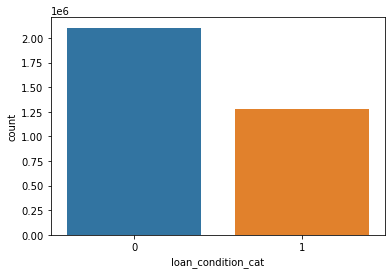

In [74]:
sns.countplot(df_loan['loan_condition_cat'])
plt.show()

<AxesSubplot:ylabel='loan_condition_cat'>

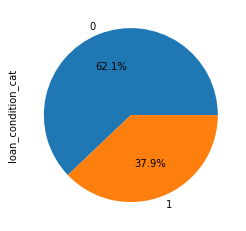

In [75]:
df_loan['loan_condition_cat'].value_counts().plot(kind='pie',autopct='%1.1f%%')

* we can see thatthe loan defaulters are 37.9%
*we can say that our data is balanced as we have balance proportion of Defaulters and non-defaulters

In [76]:
df_loan.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,2011-01-12,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,2011-01-12,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,2011-01-12,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,2011-01-12,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,2011-01-12,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Creating copy of our original dataframe and performing all modelling operation on new Dataframe.

In [78]:
df_loan_1=df_loan.copy()
df_loan_1.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,2011-01-12,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,2011-01-12,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,2011-01-12,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,2011-01-12,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,2011-01-12,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


### Dropping all the categorical columns which are already labelled and thecolumnswhich are of no use.

In [79]:
df_loan_1=df_loan_1.drop(['id', 'year', 'issue_d', 'final_d', 'home_ownership',
        'income_category','term', 'application_type', 'purpose','interest_payments',
        'loan_condition','interest_rate', 'grade','region'],axis=1)

In [80]:
df_loan_1.shape

(3387379, 16)

### Scaling the Data

In [81]:
ss=StandardScaler()

In [82]:
df_loan_ss=ss.fit_transform(df_loan_1)

In [83]:
df_loan_ss=pd.DataFrame(df_loan_ss,columns=df_loan_1.columns)
df_loan_ss.head()

,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
0,1.327373,-1.209273,-0.806140,-0.934801,-0.797057,-0.292074,-0.012283,-1.494490,-0.953279,-0.781003,-0.901603,1.154738,-0.668169,-0.578778,-0.467716,-1.028739
1,-1.351686,-1.209273,-0.702459,-0.934801,-1.146942,3.423793,-0.012283,-1.221658,1.049010,1.280404,-0.367631,-1.315386,-1.297213,-1.285476,-0.422435,-1.512576
2,1.327373,-1.209273,-1.009149,-0.934801,-1.160938,-0.292074,-0.012283,-0.948827,1.049010,-0.781003,-0.367631,-0.599838,-1.038595,-0.983180,-0.467716,-1.397534
3,1.327373,-1.209273,-0.370678,-0.934801,-0.097286,-0.292074,-0.012283,-0.675995,1.049010,-0.781003,-0.367631,0.445678,0.156998,0.198918,-0.467716,-0.200243
4,-1.210683,-1.209273,0.161554,-0.934801,-1.076965,3.423793,-0.012283,-0.675995,-0.953279,-0.781003,-0.901603,0.254741,-1.007675,-1.009139,-0.467716,-1.475199


### Separating the target variable

In [84]:
X=df_loan_ss.drop('loan_condition_cat',axis=1)

In [85]:
y=df_loan['loan_condition_cat']

In [86]:
X.shape

(3387379, 15)

In [87]:
y.shape

(3387379,)

### Building the Base model using logistic Regression

* splitting the Data and adding the Constant

In [88]:
import statsmodels.api as sm

In [89]:
X = sm.add_constant(X)

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [91]:
X_train.shape

(2371165, 16)

In [92]:
y_train.shape

(2371165,)

In [93]:
X_test.shape

(1016214, 16)

In [94]:
y_test.shape

(1016214,)

In [95]:
import statsmodels

In [96]:
import statsmodels.api as sm

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
logreg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.621964
         Iterations 8


In [99]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:     loan_condition_cat   No. Observations:              2371165
Model:                          Logit   Df Residuals:                  2371149
Method:                           MLE   Df Model:                           15
Date:                Wed, 05 Jan 2022   Pseudo R-squ.:                 0.06268
Time:                        23:08:08   Log-Likelihood:            -1.4748e+06
converged:                       True   LL-Null:                   -1.5734e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5629      0.001   -386.141      0.000      -0.566      -0.560
emp_length_int          -0.0468      0.001    -33.261      0.000      -0.050      -0.044
home_ownersh

In [100]:
print('AIC:', logreg.aic)

AIC: 2949588.979313638


We can use the AIC value to compare different models created on the same dataset.

In [101]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

,Odds
const,0.569578
emp_length_int,0.954292
home_ownership_cat,1.033067
annual_inc,0.953774
income_cat,1.203866
loan_amount,0.878991
term_cat,0.695551
application_type_cat,0.967619
purpose_cat,1.113471
interest_payment_cat,1.058601


Above Odds DataFrame consist of prob of getting loan defalut considering each column of the dataframe

In [102]:
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

3064512    0.398513
2700662    0.445366
336083     0.272315
3240965    0.552491
3269342    0.378291
dtype: float64

Since the target variable can take only two values either 0 or 1. 
We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1

In [103]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [104]:
y_pred[0:5]

[0, 0, 0, 1, 0]

In [105]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [106]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


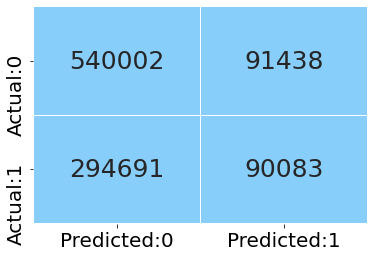

In [107]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [108]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# Compute various performance metrics.

Precision: It is defined as the ratio of true positives to the total positive predictions.

In [109]:
precision = TP / (TP+FP)
precision

0.49626764947306373

Recall: It is the ratio of true positives to the total actual positive observations. It is also known as, Sensitivity or True Positive Rate.

In [110]:
recall = TP / (TP+FN)
recall

0.234119249221621

Specificity: It is the ratio of true negatives to the total actual negative observations.

In [111]:
specificity = TN / (TN+FP)
specificity

0.8551913087545927

f1-score: It is defined as the harmonic mean of precision and recall

In [112]:
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.3181486680970166

Accuracy: It is the ratio of correct predictions (i.e. TN+TP) to the total observations. 
    According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. 
    It is not a very good measure if the dataset is imbalanced.But in our case as data is balance we can consider Accuracy as 
    good measure

In [113]:
accuracy = (TN+TP) / (TN+FP+FN+TP)
accuracy

0.6200318043246796

Interpretation: For our dataset, both the values for accuracy and f1-score are are not equal.We cannot comment on Accuracy of our model
    we need to fine tune is using outher classification models

In [115]:
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.65      0.86      0.74    631440
           1       0.50      0.23      0.32    384774

    accuracy                           0.62   1016214
   macro avg       0.57      0.54      0.53   1016214
weighted avg       0.59      0.62      0.58   1016214



From the above output, we can infer that the recall of the positive class is known as sensitivity and the recall of the negative class is specificity.

support is the number of observations in the corresponding class.

The macro average in the output is obtained by averaging the unweighted mean per label and the weighted average is given by averaging the support-weighted mean per label.

Kappa score: It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [116]:
kappa = cohen_kappa_score(y_test, y_pred)

print('kappa value:',kappa)

kappa value: 0.09958537285216307


As the kappa score for the full model (with cut-off probability 0.5) is 0.09958537285216307, we can say that there is no substantial agreement between the actual and predicted values.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

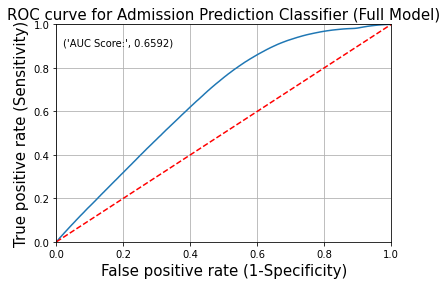

In [117]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as not far away from that line as possible
From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.6592.

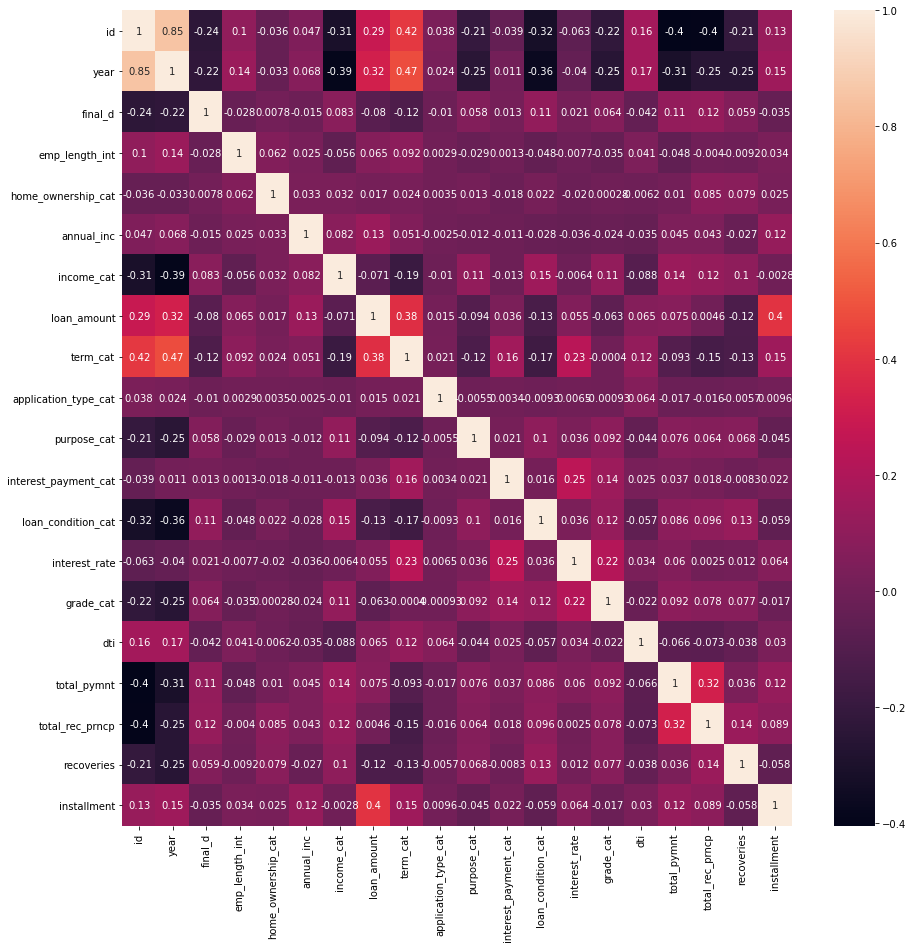

In [118]:
plt.figure(figsize=(15,15))
sns.heatmap(df_loan.corr(),annot=True)
plt.show()

In [119]:
df_loan['income_category'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [120]:
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [121]:
gr_low = df_loan[df_loan['income_category'] == 'Low']['loan_amount']
gr_Medium = df_loan[df_loan['income_category'] == 'Medium']['loan_amount']
gr_High = df_loan[df_loan['income_category'] == 'High']['loan_amount']

In [122]:
stat, p_value = stats.shapiro(df_loan['loan_amount'])
print('p-value:', p_value)

p-value: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [123]:
stat, p_value = stats.levene(gr_low, gr_Medium, gr_High) 
print('P-Value:', p_value)

P-Value: 0.0


In [124]:
t = df_loan['income_category'].nunique()
print('t:', t)

# calculate the number of students in each ethnicity
# consider the total number of students in all ethnicities
N = df_loan['income_category'].value_counts().sum()
print('N:', N)

t: 3
N: 3387379


In [125]:
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 4, dfd = 995), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 2.3809


In [126]:
f_test, p_val = stats.f_oneway(gr_low, gr_Medium, gr_High)
print('Test statistic:', f_test)
print('p-value:', p_val)

Test statistic: 15284.673035987138
p-value: 0.0


In [127]:
test = ols('loan_condition_cat ~ Q("income_category")', df_loan).fit()
anova_1 = anova_lm(test, typ = 1)
anova_1

,df,sum_sq,mean_sq,F,PR(>F)
"Q(""income_category"")",2.0,20395.115392,10197.557696,44471.282851,0.0
Residual,3387376.0,776747.599444,0.229307,NaN,NaN


In [129]:
df_loan.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

In [130]:
df_loan['home_ownership'].value_counts()

RENT        1201390
MORTGAGE    1145060
OWN          802965
OTHER        237964
Name: home_ownership, dtype: int64

In [131]:
gr_rent = df_loan[df_loan['home_ownership'] == 'RENT']['loan_amount']
gr_mortgage = df_loan[df_loan['home_ownership'] == 'MORTGAGE']['loan_amount']
gr_own = df_loan[df_loan['home_ownership'] == 'OWN']['loan_amount']
gr_other = df_loan[df_loan['home_ownership'] == 'OTHER']['loan_amount']

In [132]:
stat, p_value = stats.shapiro(df_loan['loan_amount'])
print('p-value:', p_value)

p-value: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [133]:
stat, p_value = stats.levene(gr_rent, gr_mortgage, gr_own,gr_other) 
print('P-Value:', p_value)

P-Value: 0.0


In [134]:
t = df_loan['home_ownership'].nunique()
print('t:', t)

# calculate the number of students in each ethnicity
# consider the total number of students in all ethnicities
N = df_loan['home_ownership'].value_counts().sum()
print('N:', N)

t: 4
N: 3387379


In [135]:
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 4, dfd = 995), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 2.3809


In [136]:
f_test, p_val = stats.f_oneway(gr_rent, gr_mortgage, gr_own,gr_other)
print('Test statistic:', f_test)
print('p-value:', p_val)

Test statistic: 28774.860677810088
p-value: 0.0


In [137]:
test = ols('loan_condition_cat ~ Q("income_category")', df_loan).fit()
anova_1 = anova_lm(test, typ = 1)
anova_1

,df,sum_sq,mean_sq,F,PR(>F)
"Q(""income_category"")",2.0,20395.115392,10197.557696,44471.282851,0.0
Residual,3387376.0,776747.599444,0.229307,NaN,NaN


In [138]:
from sklearn.metrics import classification_report
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [139]:
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [142]:
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.67      0.78      0.72    631440
           1       0.50      0.35      0.42    384774

    accuracy                           0.62   1016214
   macro avg       0.58      0.57      0.57   1016214
weighted avg       0.60      0.62      0.61   1016214



# Part 2

In [310]:
df_loan.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,2011-01-12,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,2011-01-12,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,2011-01-12,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,2011-01-12,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,2011-01-12,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [311]:
df_loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [312]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387379 entries, 0 to 3387378
Data columns (total 30 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id                    int64         
 1   year                  int64         
 2   issue_d               datetime64[ns]
 3   final_d               int64         
 4   emp_length_int        float64       
 5   home_ownership        object        
 6   home_ownership_cat    int64         
 7   income_category       object        
 8   annual_inc            int64         
 9   income_cat            int64         
 10  loan_amount           int64         
 11  term                  object        
 12  term_cat              int64         
 13  application_type      object        
 14  application_type_cat  int64         
 15  purpose               object        
 16  purpose_cat           int64         
 17  interest_payments     object        
 18  interest_payment_cat  int64         
 19  

In [313]:
df_loan.nunique()

id                       887379
year                          9
issue_d                     103
final_d                      98
emp_length_int          2492856
home_ownership                4
home_ownership_cat            6
income_category               3
annual_inc                45784
income_cat                    3
loan_amount                1372
term                          2
term_cat                      2
application_type              2
application_type_cat          2
purpose                      14
purpose_cat                  14
interest_payments             2
interest_payment_cat          2
loan_condition                2
loan_condition_cat            2
interest_rate           2487791
grade                         7
grade_cat                     7
dti                     2495859
total_pymnt             2997713
total_rec_prncp         2753671
recoveries              2516340
installment             2562730
region                        5
dtype: int64

In [314]:
df_new=df_loan.copy()
df_new.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,2011-01-12,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,2011-01-12,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,2011-01-12,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,2011-01-12,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,2011-01-12,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [315]:
df_new.drop_duplicates(subset ="id",keep = False, inplace = True)
df_new.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,2011-01-12,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,2011-01-12,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,2011-01-12,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,2011-01-12,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,2011-01-12,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [316]:
df_new.shape

(885943, 30)

In [317]:
df_new = df_new.sample(n = 100000)

In [318]:
df_new=df_new.drop(columns=['id','year','issue_d','final_d'],axis=1)

In [319]:
df_new.columns

Index(['emp_length_int', 'home_ownership', 'home_ownership_cat',
       'income_category', 'annual_inc', 'income_cat', 'loan_amount', 'term',
       'term_cat', 'application_type', 'application_type_cat', 'purpose',
       'purpose_cat', 'interest_payments', 'interest_payment_cat',
       'loan_condition', 'loan_condition_cat', 'interest_rate', 'grade',
       'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries',
       'installment', 'region'],
      dtype='object')

In [320]:
df_new_num=df_new[['annual_inc','loan_amount','dti','total_pymnt','total_rec_prncp','installment','interest_rate']]
df_new_num.head()

,annual_inc,loan_amount,dti,total_pymnt,total_rec_prncp,installment,interest_rate
336745,60000,10000,20.10,11055.06,10000.00,341.68,13.98
475173,110000,10000,3.05,0.00,0.00,334.97,12.59
475640,85400,14500,32.48,0.00,0.00,341.01,14.48
339952,105000,17000,27.97,18480.02,17000.00,535.79,8.39
547179,300000,35000,8.75,2357.63,1569.54,1207.30,14.65


In [321]:
list1=['annual_inc','loan_amount','dti','total_pymnt','total_rec_prncp','installment','interest_rate']
list2=[]
for i in df_new.columns:
    if i not in list1:
        list2.append(i)
        
print(list2)

['emp_length_int', 'home_ownership', 'home_ownership_cat', 'income_category', 'income_cat', 'term', 'term_cat', 'application_type', 'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments', 'interest_payment_cat', 'loan_condition', 'loan_condition_cat', 'grade', 'grade_cat', 'recoveries', 'region']


In [322]:
df_new_cat=df_new.copy()

In [323]:
df_new_cat=df_new_cat[list2]
df_new_cat.head()

,emp_length_int,home_ownership,home_ownership_cat,income_category,income_cat,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,interest_payment_cat,loan_condition,loan_condition_cat,grade,grade_cat,recoveries,region
336745,9.0,MORTGAGE,3,Low,1,36 months,1,INDIVIDUAL,1,debt_consolidation,6,High,2,Good Loan,0,C,3,0.0,ulster
475173,10.0,RENT,1,Medium,2,36 months,1,INDIVIDUAL,1,debt_consolidation,6,Low,1,Good Loan,0,C,3,0.0,ulster
475640,10.0,RENT,1,Low,1,60 months,2,INDIVIDUAL,1,debt_consolidation,6,High,2,Good Loan,0,C,3,0.0,ulster
339952,4.0,MORTGAGE,3,Medium,2,36 months,1,INDIVIDUAL,1,credit_card,1,Low,1,Good Loan,0,A,1,0.0,Northern-Irl
547179,0.5,RENT,1,High,3,36 months,1,INDIVIDUAL,1,other,4,High,2,Good Loan,0,C,3,0.0,ulster


## Capping of Outliers

In [324]:
for col in df_new_num.columns:
    percentiles = df_new_num[col].quantile([0.01, 0.99]).values
    df_new_num[col] = np.clip(df_new_num[col], percentiles[0], percentiles[1])

<ipython-input-324-0d307f488097>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_num[col] = np.clip(df_new_num[col], percentiles[0], percentiles[1])


### Checking for imbalance in target variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_condition', ylabel='count'>

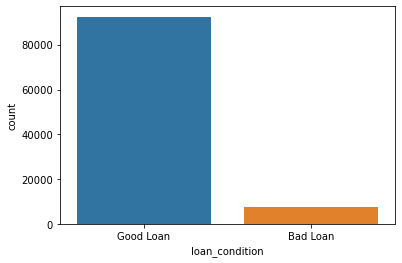

In [325]:
sns.countplot(df_new_cat['loan_condition'])

### Checking for outliers

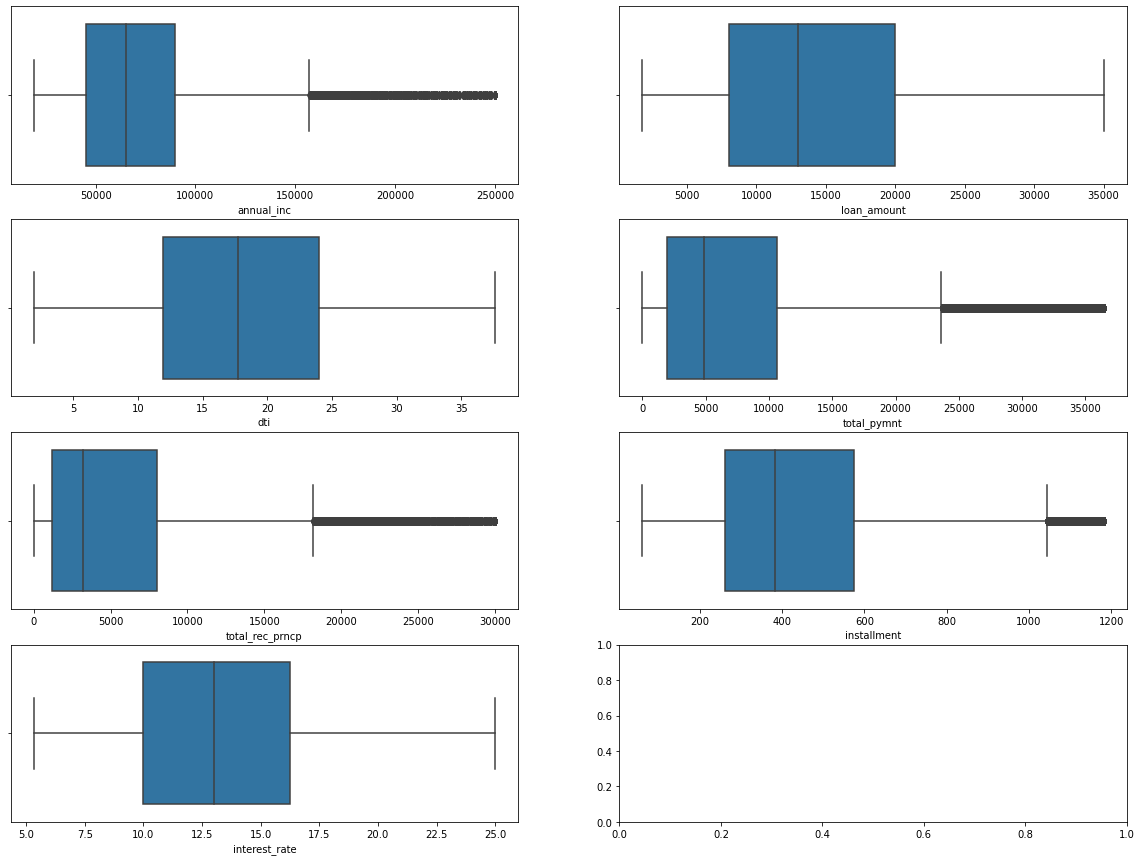

In [326]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,15))
for variable,subplot in zip(df_new_num.columns,ax.flatten()):
    sns.boxplot(x=df_new_num[variable],ax=subplot)

### Distribution for numerical columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

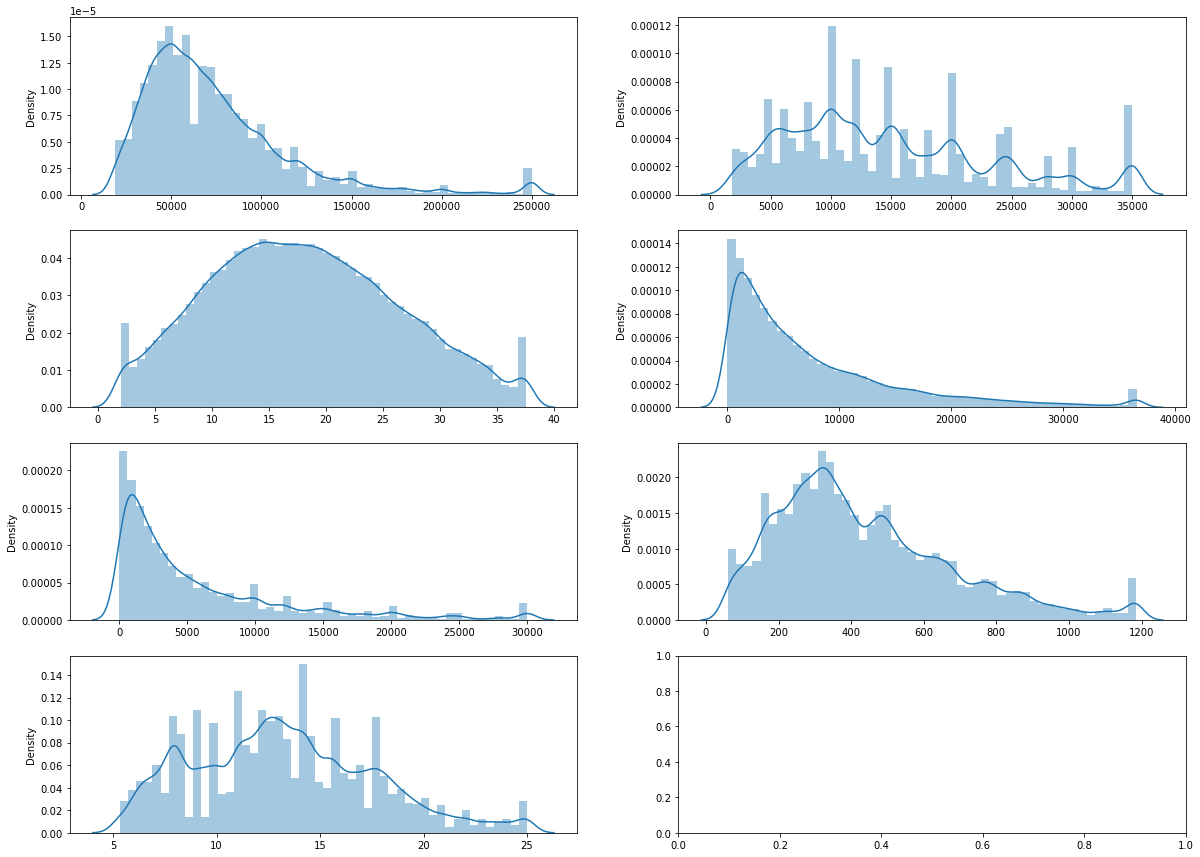

In [307]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,15))
for variable,subplot in zip(df_new_num.columns,ax.flatten()):
    sns.distplot(x=df_new_num[variable],ax=subplot)

There is skewness present in two columns named annual_inc and installment.

# Log Transformation

In [327]:
list3=['annual_inc','installment']

In [328]:
for i in list3:
    print('Skew before log tranform',df_new_num[i].skew())
    df_new_num[i] = np.log(df_new_num[i])
    print('Skew after log transform',df_new_num[i].skew())

Skew before log tranform 1.7451218341864394
Skew after log transform 0.12501705282099282
Skew before log tranform 0.895278200999291
Skew after log transform -0.5508508192690219


<ipython-input-328-3fb37a949dff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_num[i] = np.log(df_new_num[i])


We can see above that the skewness is reduced for both the columns.

#### Converting recoveries column values to 0 and 1. 

In [329]:
def clean(item):
    
    if item==0:
        a=0
        return a
    else:
        a=1
        return a
df_new_cat['recoveries_cat']=df_new_cat['recoveries'].apply(clean)

In [330]:
df_new_cat.head()

,emp_length_int,home_ownership,home_ownership_cat,income_category,income_cat,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,interest_payment_cat,loan_condition,loan_condition_cat,grade,grade_cat,recoveries,region,recoveries_cat
336745,9.0,MORTGAGE,3,Low,1,36 months,1,INDIVIDUAL,1,debt_consolidation,6,High,2,Good Loan,0,C,3,0.0,ulster,0
475173,10.0,RENT,1,Medium,2,36 months,1,INDIVIDUAL,1,debt_consolidation,6,Low,1,Good Loan,0,C,3,0.0,ulster,0
475640,10.0,RENT,1,Low,1,60 months,2,INDIVIDUAL,1,debt_consolidation,6,High,2,Good Loan,0,C,3,0.0,ulster,0
339952,4.0,MORTGAGE,3,Medium,2,36 months,1,INDIVIDUAL,1,credit_card,1,Low,1,Good Loan,0,A,1,0.0,Northern-Irl,0
547179,0.5,RENT,1,High,3,36 months,1,INDIVIDUAL,1,other,4,High,2,Good Loan,0,C,3,0.0,ulster,0


### Merging and minimizing the categories of the categorical columns.

In [331]:
df_new_cat['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'major_purchase', 'medical', 'small_business', 'car', 'vacation',
       'house', 'wedding', 'renewable_energy', 'moving', 'educational'],
      dtype=object)

In [332]:
df_new_cat['purpose'].value_counts()

debt_consolidation    59174
credit_card           22976
home_improvement       5951
other                  4826
major_purchase         1950
small_business         1172
car                    1000
medical                 963
moving                  598
vacation                559
house                   458
wedding                 262
renewable_energy         64
educational              47
Name: purpose, dtype: int64

In [333]:
def purpose(item):
    list1=['debt_consolidation','credit_card','major_purchase','small_business','renewable_energy']
    list2=['home_improvement','car','medical','moving','vacation','house','wedding','education']
    a=''
    if item in list1:
        a='Debt Clearance'
        return a
    elif item in list2:
        a='Personal loan'
        return a
    else:
        a='Other'
        return a
        

In [334]:
df_new_cat['purpose']=df_new_cat['purpose'].apply(purpose)

In [335]:
df_new_cat['purpose'].value_counts()

Debt Clearance    85336
Personal loan      9791
Other              4873
Name: purpose, dtype: int64

In [337]:
df_new_cat['grade'].value_counts()

B    28572
C    27664
A    16738
D    15691
E     8048
F     2647
G      640
Name: grade, dtype: int64

In [338]:
df_new_cat['grade'].unique()

array(['C', 'A', 'B', 'D', 'E', 'F', 'G'], dtype=object)

In [340]:
def grade(item):
    a=''
    if item=='A' or item=='B':
        a='A'
        return a
    elif item=='C' or item=='D':
        a='B'
        return a
    else:
        a='C'
        return a
    

In [341]:
df_new_cat['grade']=df_new_cat['grade'].apply(grade)

In [342]:
df_new_cat['grade'].value_counts()

A    45310
B    43355
C    11335
Name: grade, dtype: int64

In [343]:
df_new_cat['region'].value_counts()

leinster        24090
ulster          23612
Northern-Irl    23045
cannught        17350
munster         11903
Name: region, dtype: int64

In [344]:
def region(item):
    a=''
    if item=='munster' or item=='cannught':
        a='cannught'
        return a
    else:
        return item

In [345]:
df_new_cat['region']=df_new_cat['region'].apply(region)

In [346]:
df_new_cat['region'].value_counts()

cannught        29253
leinster        24090
ulster          23612
Northern-Irl    23045
Name: region, dtype: int64

In [347]:
df_new_cat.head()

,emp_length_int,home_ownership,home_ownership_cat,income_category,income_cat,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,interest_payment_cat,loan_condition,loan_condition_cat,grade,grade_cat,recoveries,region,recoveries_cat
336745,9.0,MORTGAGE,3,Low,1,36 months,1,INDIVIDUAL,1,Debt Clearance,6,High,2,Good Loan,0,B,3,0.0,ulster,0
475173,10.0,RENT,1,Medium,2,36 months,1,INDIVIDUAL,1,Debt Clearance,6,Low,1,Good Loan,0,B,3,0.0,ulster,0
475640,10.0,RENT,1,Low,1,60 months,2,INDIVIDUAL,1,Debt Clearance,6,High,2,Good Loan,0,B,3,0.0,ulster,0
339952,4.0,MORTGAGE,3,Medium,2,36 months,1,INDIVIDUAL,1,Debt Clearance,1,Low,1,Good Loan,0,A,1,0.0,Northern-Irl,0
547179,0.5,RENT,1,High,3,36 months,1,INDIVIDUAL,1,Other,4,High,2,Good Loan,0,B,3,0.0,ulster,0


In [348]:
df_emp_rec=df_new_cat[['emp_length_int','recoveries_cat']]
df_emp_rec.head()

,emp_length_int,recoveries_cat
336745,9.0,0
475173,10.0,0
475640,10.0,0
339952,4.0,0
547179,0.5,0


In [349]:
df_new_num=pd.concat([df_new_num,df_emp_rec],axis=1)
df_new_num.head()

,annual_inc,loan_amount,dti,total_pymnt,total_rec_prncp,installment,interest_rate,emp_length_int,recoveries_cat
336745,11.002100,10000,20.10,11055.06,10000.00,5.833875,13.98,9.0,0
475173,11.608236,10000,3.05,0.00,0.00,5.814041,12.59,10.0,0
475640,11.355101,14500,32.48,0.00,0.00,5.831912,14.48,10.0,0
339952,11.561716,17000,27.97,18480.02,17000.00,6.283742,8.39,4.0,0
547179,12.429216,35000,8.75,2357.63,1569.54,7.074244,14.65,0.5,0


In [350]:
df_new_cat=df_new_cat.select_dtypes(include=np.object)
df_new_cat.head()

<ipython-input-350-c7e4fa64fee9>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_new_cat=df_new_cat.select_dtypes(include=np.object)


,home_ownership,income_category,term,application_type,purpose,interest_payments,loan_condition,grade,region
336745,MORTGAGE,Low,36 months,INDIVIDUAL,Debt Clearance,High,Good Loan,B,ulster
475173,RENT,Medium,36 months,INDIVIDUAL,Debt Clearance,Low,Good Loan,B,ulster
475640,RENT,Low,60 months,INDIVIDUAL,Debt Clearance,High,Good Loan,B,ulster
339952,MORTGAGE,Medium,36 months,INDIVIDUAL,Debt Clearance,Low,Good Loan,A,Northern-Irl
547179,RENT,High,36 months,INDIVIDUAL,Other,High,Good Loan,B,ulster


In [351]:
df_loan_new=pd.concat([df_new_num,df_new_cat],axis=1)
df_loan_new.head()

,annual_inc,loan_amount,dti,total_pymnt,total_rec_prncp,installment,interest_rate,emp_length_int,recoveries_cat,home_ownership,income_category,term,application_type,purpose,interest_payments,loan_condition,grade,region
336745,11.002100,10000,20.10,11055.06,10000.00,5.833875,13.98,9.0,0,MORTGAGE,Low,36 months,INDIVIDUAL,Debt Clearance,High,Good Loan,B,ulster
475173,11.608236,10000,3.05,0.00,0.00,5.814041,12.59,10.0,0,RENT,Medium,36 months,INDIVIDUAL,Debt Clearance,Low,Good Loan,B,ulster
475640,11.355101,14500,32.48,0.00,0.00,5.831912,14.48,10.0,0,RENT,Low,60 months,INDIVIDUAL,Debt Clearance,High,Good Loan,B,ulster
339952,11.561716,17000,27.97,18480.02,17000.00,6.283742,8.39,4.0,0,MORTGAGE,Medium,36 months,INDIVIDUAL,Debt Clearance,Low,Good Loan,A,Northern-Irl
547179,12.429216,35000,8.75,2357.63,1569.54,7.074244,14.65,0.5,0,RENT,High,36 months,INDIVIDUAL,Other,High,Good Loan,B,ulster


In [352]:
df_loan_new['loan_condition']=df_loan_new['loan_condition'].replace({'Good Loan':1,'Bad Loan':0})


In [353]:
df_loan_new['loan_condition'].value_counts()

1    92477
0     7523
Name: loan_condition, dtype: int64

In [354]:
y=df_loan_new['loan_condition']
y.head()

336745    1
475173    1
475640    1
339952    1
547179    1
Name: loan_condition, dtype: int64

In [355]:
df_loan_new.drop(columns=['loan_condition'],axis=1,inplace=True)

In [356]:
df_loan_new.head()

,annual_inc,loan_amount,dti,total_pymnt,total_rec_prncp,installment,interest_rate,emp_length_int,recoveries_cat,home_ownership,income_category,term,application_type,purpose,interest_payments,grade,region
336745,11.002100,10000,20.10,11055.06,10000.00,5.833875,13.98,9.0,0,MORTGAGE,Low,36 months,INDIVIDUAL,Debt Clearance,High,B,ulster
475173,11.608236,10000,3.05,0.00,0.00,5.814041,12.59,10.0,0,RENT,Medium,36 months,INDIVIDUAL,Debt Clearance,Low,B,ulster
475640,11.355101,14500,32.48,0.00,0.00,5.831912,14.48,10.0,0,RENT,Low,60 months,INDIVIDUAL,Debt Clearance,High,B,ulster
339952,11.561716,17000,27.97,18480.02,17000.00,6.283742,8.39,4.0,0,MORTGAGE,Medium,36 months,INDIVIDUAL,Debt Clearance,Low,A,Northern-Irl
547179,12.429216,35000,8.75,2357.63,1569.54,7.074244,14.65,0.5,0,RENT,High,36 months,INDIVIDUAL,Other,High,B,ulster


In [357]:
df_loan_new=pd.get_dummies(df_loan_new,drop_first=True)
df_loan_new.head()

,annual_inc,loan_amount,dti,total_pymnt,total_rec_prncp,installment,interest_rate,emp_length_int,recoveries_cat,home_ownership_OTHER,...,term_ 60 months,application_type_JOINT,purpose_Other,purpose_Personal loan,interest_payments_Low,grade_B,grade_C,region_cannught,region_leinster,region_ulster
336745,11.002100,10000,20.10,11055.06,10000.00,5.833875,13.98,9.0,0,0,...,0,0,0,0,0,1,0,0,0,1
475173,11.608236,10000,3.05,0.00,0.00,5.814041,12.59,10.0,0,0,...,0,0,0,0,1,1,0,0,0,1
475640,11.355101,14500,32.48,0.00,0.00,5.831912,14.48,10.0,0,0,...,1,0,0,0,0,1,0,0,0,1
339952,11.561716,17000,27.97,18480.02,17000.00,6.283742,8.39,4.0,0,0,...,0,0,0,0,1,0,0,0,0,0
547179,12.429216,35000,8.75,2357.63,1569.54,7.074244,14.65,0.5,0,0,...,0,0,1,0,0,1,0,0,0,1


In [358]:
df_loan_new.columns

Index(['annual_inc', 'loan_amount', 'dti', 'total_pymnt', 'total_rec_prncp',
       'installment', 'interest_rate', 'emp_length_int', 'recoveries_cat',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'income_category_Low', 'income_category_Medium', 'term_ 60 months',
       'application_type_JOINT', 'purpose_Other', 'purpose_Personal loan',
       'interest_payments_Low', 'grade_B', 'grade_C', 'region_cannught',
       'region_leinster', 'region_ulster'],
      dtype='object')

In [359]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [360]:
df_X=df_loan_new.copy()
df_X.head()

,annual_inc,loan_amount,dti,total_pymnt,total_rec_prncp,installment,interest_rate,emp_length_int,recoveries_cat,home_ownership_OTHER,...,term_ 60 months,application_type_JOINT,purpose_Other,purpose_Personal loan,interest_payments_Low,grade_B,grade_C,region_cannught,region_leinster,region_ulster
336745,11.002100,10000,20.10,11055.06,10000.00,5.833875,13.98,9.0,0,0,...,0,0,0,0,0,1,0,0,0,1
475173,11.608236,10000,3.05,0.00,0.00,5.814041,12.59,10.0,0,0,...,0,0,0,0,1,1,0,0,0,1
475640,11.355101,14500,32.48,0.00,0.00,5.831912,14.48,10.0,0,0,...,1,0,0,0,0,1,0,0,0,1
339952,11.561716,17000,27.97,18480.02,17000.00,6.283742,8.39,4.0,0,0,...,0,0,0,0,1,0,0,0,0,0
547179,12.429216,35000,8.75,2357.63,1569.54,7.074244,14.65,0.5,0,0,...,0,0,1,0,0,1,0,0,0,1


#### Checking for standard deviation

In [361]:
df_X.std()

annual_inc                   0.509573
loan_amount               8411.640758
dti                          8.272483
total_pymnt               7676.504870
total_rec_prncp           6459.074137
installment                  0.607519
interest_rate                4.373683
emp_length_int               3.496466
recoveries_cat               0.164285
home_ownership_OTHER         0.014831
home_ownership_OWN           0.298274
home_ownership_RENT          0.490095
income_category_Low          0.382489
income_category_Medium       0.365454
term_ 60 months              0.458530
application_type_JOINT       0.023868
purpose_Other                0.215304
purpose_Personal loan        0.297194
interest_payments_Low        0.499490
grade_B                      0.495567
grade_C                      0.317022
region_cannught              0.454927
region_leinster              0.427632
region_ulster                0.424699
dtype: float64

## Standard Scaling

In [362]:
ss=StandardScaler()
df_X_ss=ss.fit_transform(df_X)
df_X_ss=pd.DataFrame(df_X_ss,columns=df_X.columns)
df_X_ss.head()

,annual_inc,loan_amount,dti,total_pymnt,total_rec_prncp,installment,interest_rate,emp_length_int,recoveries_cat,home_ownership_OTHER,...,term_ 60 months,application_type_JOINT,purpose_Other,purpose_Personal loan,interest_payments_Low,grade_B,grade_C,region_cannught,region_leinster,region_ulster
0,-0.147108,-0.567273,0.234358,0.462475,0.663671,-0.131748,0.166104,0.835079,-0.168975,-0.014834,...,-0.655620,-0.023881,-0.226332,-0.329449,-1.046332,1.143039,-0.357548,-0.64303,-0.563338,1.798648
1,1.042396,-0.567273,-1.826703,-0.977649,-0.884547,-0.164395,-0.151708,1.121083,-0.168975,-0.014834,...,-0.655620,-0.023881,-0.226332,-0.329449,0.955719,1.143039,-0.357548,-0.64303,-0.563338,1.798648
2,0.545635,-0.032298,1.730893,-0.977649,-0.884547,-0.134979,0.280424,1.121083,-0.168975,-0.014834,...,1.525273,-0.023881,-0.226332,-0.329449,-1.046332,1.143039,-0.357548,-0.64303,-0.563338,1.798648
3,0.951103,0.264911,1.185709,1.429712,1.747423,0.608756,-1.112002,-0.594944,-0.168975,-0.014834,...,-0.655620,-0.023881,-0.226332,-0.329449,0.955719,-0.874860,-0.357548,-0.64303,-0.563338,-0.555973
4,2.653518,2.404813,-1.137668,-0.670524,-0.641548,1.909960,0.319293,-1.595959,-0.168975,-0.014834,...,-0.655620,-0.023881,4.418285,-0.329449,-1.046332,1.143039,-0.357548,-0.64303,-0.563338,1.798648


In [392]:
from sklearn.tree import DecisionTreeClassifier

### Train Test Split

In [393]:
X_train,X_test,y_train,y_test=train_test_split(df_X_ss,y,test_size=0.30,random_state=10)

# Decision Tree Model

In [394]:
dt=DecisionTreeClassifier() 
dt_model=dt.fit(X_train,y_train)

In [395]:
y_pred_train=dt_model.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5278
           1       1.00      1.00      1.00     64722

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000



In [396]:
y_pred_test=dt_model.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.46      0.51      0.48      2245
           1       0.96      0.95      0.96     27755

    accuracy                           0.92     30000
   macro avg       0.71      0.73      0.72     30000
weighted avg       0.92      0.92      0.92     30000



### ROC - Curve

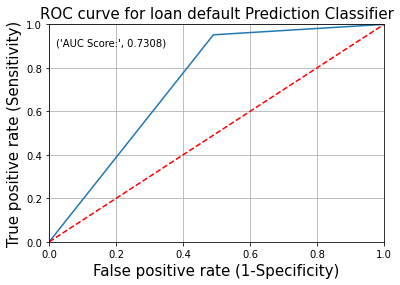

In [400]:
plot_roc(dt_model, test_data = X_test)

In [368]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## SMOTE Analysis

In [369]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=0)
X_train,y_train=smt.fit_resample(X_train,y_train)

# Decision Tree Model

In [370]:
dt=DecisionTreeClassifier() 
dt_model=dt.fit(X_train,y_train)

In [371]:
y_pred_train=dt_model.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64722
           1       1.00      1.00      1.00     64722

    accuracy                           1.00    129444
   macro avg       1.00      1.00      1.00    129444
weighted avg       1.00      1.00      1.00    129444



In [372]:
y_pred_test=dt_model.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.36      0.53      0.43      2245
           1       0.96      0.92      0.94     27755

    accuracy                           0.89     30000
   macro avg       0.66      0.73      0.69     30000
weighted avg       0.92      0.89      0.90     30000



### Important features

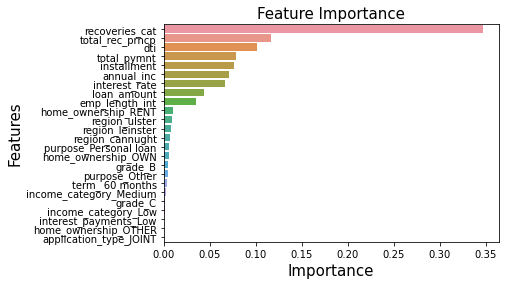

In [418]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': dt_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

# Random Forest Model

In [382]:
from sklearn.ensemble import RandomForestClassifier

In [383]:
rf=RandomForestClassifier()
rf_model=dt.fit(X_train,y_train)

In [384]:
y_pred_test=rf_model.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.36      0.53      0.43      2245
           1       0.96      0.93      0.94     27755

    accuracy                           0.90     30000
   macro avg       0.66      0.73      0.69     30000
weighted avg       0.92      0.90      0.90     30000



### importing required libraries

In [385]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### User - defined function to get the test report

In [386]:
def get_test_report(model, test_data):
    test_pred = model.predict(test_data)
    return(classification_report(y_test, test_pred))

#### User - defined function to plot confusion matrix

In [387]:
def plot_confusion_matrix(model, test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

#### User - defined function to plot ROC - Curve

In [398]:
def plot_roc(model, test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for loan default Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

### Confusion Matrix

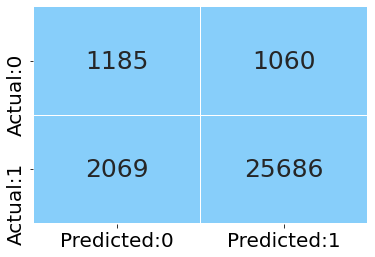

In [389]:
plot_confusion_matrix(rf_model, test_data = X_test)

In [390]:
test_report = get_test_report(rf_model, test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.36      0.53      0.43      2245
           1       0.96      0.93      0.94     27755

    accuracy                           0.90     30000
   macro avg       0.66      0.73      0.69     30000
weighted avg       0.92      0.90      0.90     30000



### ROC - Curve

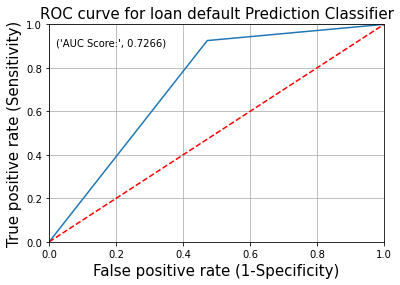

In [399]:
plot_roc(rf_model, test_data = X_test)

### Important features 

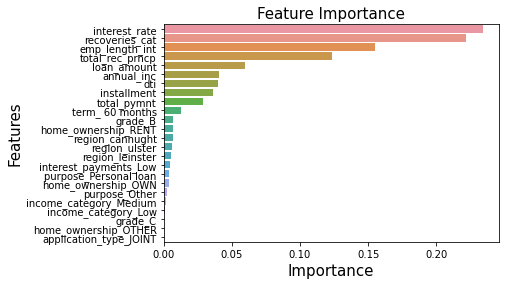

In [417]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

### Importing required libraries

In [403]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [402]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# AdaBoost Model

In [404]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [406]:
test_report = get_test_report(ada_model,test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      0.38      0.55      2245
           1       0.95      1.00      0.98     27755

    accuracy                           0.95     30000
   macro avg       0.98      0.69      0.76     30000
weighted avg       0.96      0.95      0.94     30000



### ROC - Curve

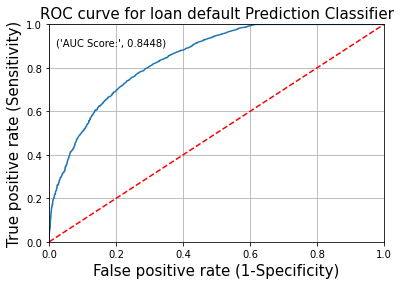

In [408]:
plot_roc(ada_model,test_data = X_test)

### Important features

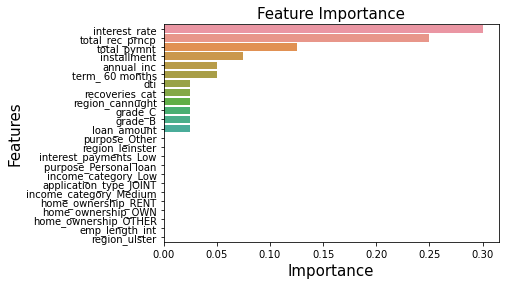

In [419]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': ada_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

# Gradient Boosting Model

In [410]:
gboost_model = GradientBoostingClassifier(n_estimators = 75, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=75, random_state=10)

In [420]:
test_report = get_test_report(gboost_model,test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.43      0.59      2245
           1       0.96      1.00      0.98     27755

    accuracy                           0.96     30000
   macro avg       0.96      0.71      0.78     30000
weighted avg       0.96      0.96      0.95     30000



### ROC - Curve

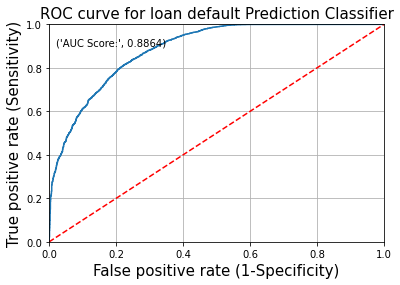

In [412]:
plot_roc(gboost_model,test_data = X_test)

### Important features

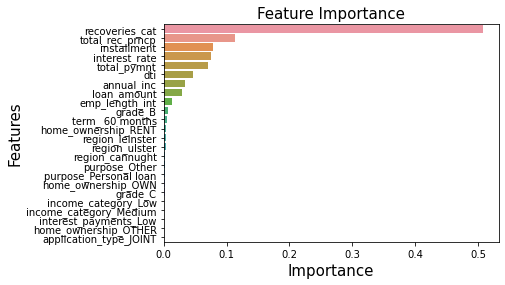

In [421]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': gboost_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

# XGBoost Model

In [413]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [414]:
test_report = get_test_report(xgb_model,test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.44      0.60      2245
           1       0.96      1.00      0.98     27755

    accuracy                           0.96     30000
   macro avg       0.95      0.72      0.79     30000
weighted avg       0.96      0.96      0.95     30000



### ROC - Curve

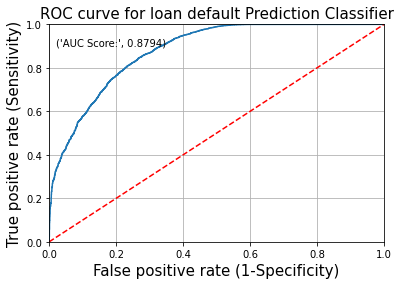

In [415]:
plot_roc(xgb_model,test_data = X_test)

### Important features

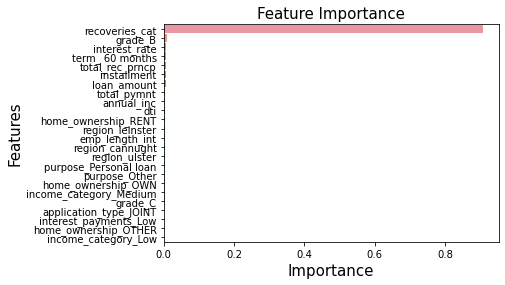

In [416]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

### Taking 10000 samples for training and testing the data.

In [423]:
X_train=X_train.sample(n=10000)
X_train.head()

,annual_inc,loan_amount,dti,total_pymnt,total_rec_prncp,installment,interest_rate,emp_length_int,recoveries_cat,home_ownership_OTHER,...,term_ 60 months,application_type_JOINT,purpose_Other,purpose_Personal loan,interest_payments_Low,grade_B,grade_C,region_cannught,region_leinster,region_ulster
44767,1.515661,-0.567273,-0.020706,-0.279686,-0.201648,-0.264687,-1.112002,0.263070,-0.168975,-0.014834,...,-0.65562,-0.023881,-0.226332,-0.329449,0.955719,-0.874860,-0.357548,1.555138,-0.563338,-0.555973
62534,0.523683,-0.329506,0.465245,-0.085442,-0.253896,0.168619,0.168390,1.121083,5.918028,-0.014834,...,-0.65562,-0.023881,-0.226332,-0.329449,-1.046332,1.143039,-0.357548,1.555138,-0.563338,-0.555973
7524,1.213150,0.383794,-1.011949,-0.168181,-0.104191,0.697997,-1.157730,-0.880948,-0.168975,-0.014834,...,-0.65562,-0.023881,-0.226332,-0.329449,0.955719,-0.874860,-0.357548,-0.643030,-0.563338,1.798648
14657,-0.051360,0.383794,0.456783,-0.319459,-0.248211,0.690735,-1.226322,1.121083,-0.168975,-0.014834,...,-0.65562,-0.023881,-0.226332,-0.329449,0.955719,-0.874860,-0.357548,1.555138,-0.563338,-0.555973
8836,-0.317862,-0.805040,0.363703,-0.645515,-0.629599,-0.439352,0.753712,1.121083,-0.168975,-0.014834,...,-0.65562,-0.023881,-0.226332,-0.329449,-1.046332,1.143039,-0.357548,1.555138,-0.563338,-0.555973


In [424]:
y_train=y_train.sample(n=10000)
y_train.head()

19269     1
763799    0
137599    1
671917    1
727237    1
Name: loan_condition, dtype: int64

# Random Forest using GridSearchCV 

In [425]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

In [426]:
random_forest_classification = RandomForestClassifier(random_state = 10)

In [427]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

In [429]:
rf_grid_model = rf_grid.fit(X_train, y_train)

### Best Parameters  

In [430]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

# Random Forest Using Best Parameters

In [432]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)
rf_model = rf_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(rf_model,test_data = X_test))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2245
           1       0.93      1.00      0.96     27755

    accuracy                           0.93     30000
   macro avg       0.46      0.50      0.48     30000
weighted avg       0.86      0.93      0.89     30000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Important features

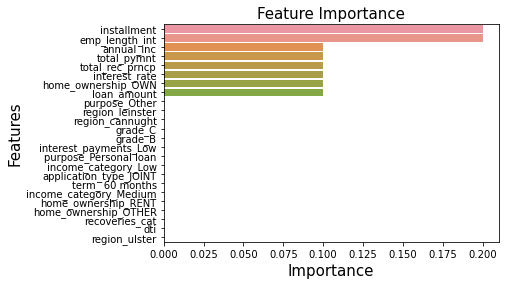

In [433]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

# Logistic regression
Baseline model should be simple. Simple models are less likely to overfit. ...
Baseline model should be interpretable. Explainability will help you to get a better understanding of your data and will show you a direction for the feature engineering.


Decision trees help you to evaluate your options. Decision Trees are excellent tools for helping you to choose between several courses of action. They provide a highly effective structure within which you can lay out options and investigate the possible outcomes of choosing those options.